In [ ]:
!pip install jax
!pip install tinygp

In [5]:
import jax
jax.config.update("jax_enable_x64", True)
import tinygp
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

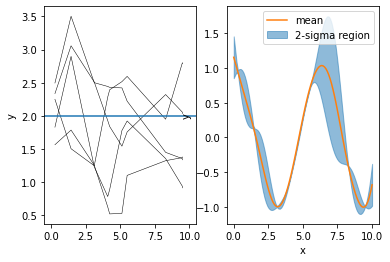

In [6]:
random = np.random.default_rng(1)
X = np.sort(random.uniform(0, 10, 10))
y = np.cos(X)
kernel = 0.5 * tinygp.kernels.ExpSquared(scale=1.0)
gp = tinygp.GaussianProcess(kernel, X, diag=1e-5, mean=2.0)
y_const = gp.sample(jax.random.PRNGKey(4), shape=(5,))
mean = 2.0

X_test = np.linspace(0, 10, 100)
_, cond_gp = gp.condition(y, X_test)
mu = cond_gp.mean
std = np.sqrt(cond_gp.variance)

_, axes = plt.subplots(1, 2, sharex=True)
ax = axes[0]
ax.plot(X, y_const.T, color="k", lw=0.5)
ax.axhline(2.0, label='mean')
ax.set_ylabel("y")

ax = axes[1]
ax.plot(X_test, mu, "C1", label="mean")
ax.fill_between(
    X_test, mu + std*2, mu - std*2, color="C0", alpha=0.5,label="2-sigma region"
)
ax.legend()
ax.set_xlabel("x")
_ = ax.set_ylabel("y")
plt.savefig('gp.png')
files.download("gp.png") 